In [1]:
import sys
import numpy
import pandas
import matplotlib
import sklearn

In [2]:
print('Python  : {}'.format(sys.version))
print('Numpy  : {}'.format(numpy.__version__))
print('Pandas  : {}'.format(pandas.__version__))
print('Matplotlib  : {}'.format(matplotlib.__version__))
print('Sklearn  : {}'.format(sklearn.__version__))

Python  : 3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
Numpy  : 1.14.0
Pandas  : 0.24.2
Matplotlib  : 1.5.3
Sklearn  : 0.18


In [3]:
import numpy as np
from sklearn import preprocessing, cross_validation
from sklearn.neighbors import KNeighborsClassifier #to use KNN
from sklearn.svm import SVC #to use SVM
from sklearn import model_selection #to use both of them in one step
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

c:\users\sradhakr\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
#loading the dataset from UCI Repository
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisoncsin/breast-cancer-wisconsin.data"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id','clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion','single_epithelial_sie',
         'bare_nuclei','bland_chromatin','normal_nucleoli','mitosis','class']
df = pd.read_csv(url,names = names)

In [5]:
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_sie,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
#we need to visualize the data set, because we need to explore the dataset before we begin. Understnding the data helps use to
#find which algorith to use and what result we are looking for - what is considered to be a good result.
#Preprocess data

#Handle missing or blank data 
df.replace ('?',-99999,inplace = True) #replace questions mark with -99999 and make the change inplace the data frame
print(df.axes) #a list epresenting the row axis labels and column axis labels are returned 

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_sie', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitosis', 'class'],
      dtype='object')]


In [7]:
df.tail()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_sie,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [8]:
#print the shape of the dataset 
df.shape

(699, 11)

In [9]:
#drop the columns that are not necessary for building the model or doing the prediction. 
# the column id is not going to help us in prediction as it repersents the code number for the sample 
df.drop(['id'],1, inplace = True) #'id' represents the lable and 1 represents the axis - column

In [10]:
#data set visualisations
#print just the first row in the dataset - access by row name not index of the row 
print(df.loc[0])

clump_thickness          5
uniform_cell_size        1
uniform_cell_shape       1
marginal_adhesion        1
single_epithelial_sie    2
bare_nuclei              1
bland_chromatin          3
normal_nucleoli          1
mitosis                  1
class                    2
Name: 0, dtype: object


In [11]:
#randomly print another row by row name 
print(df.loc[698])

clump_thickness           4
uniform_cell_size         8
uniform_cell_shape        8
marginal_adhesion         5
single_epithelial_sie     4
bare_nuclei               5
bland_chromatin          10
normal_nucleoli           4
mitosis                   1
class                     4
Name: 698, dtype: object


In [12]:
print(df.describe()) #gives the mean, std, min, max, etc., for each of our attribute/feature
# mean of the class is closer to 2 , meaning there are more benign cases than malignant cases.
# - 99999 is ignored! (but how)
#The first quartile (Q1) is defined as the middle number between the smallest number and the median of the data set. 25%
#The second quartile (Q2) is the median of the data. 50%
#The third quartile (Q3) is the middle value between the median and the highest value of the data set. 75%

       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_sie  bland_chromatin  \
count         699.000000             699.000000       699.000000   
mean            2.806867               3.216023         3.437768   
std             2.855379               2.214300         2.438364   
min             1.000000               1.000000         1.000000   
25%             1.000000               2.000000         2.000000   
50%   

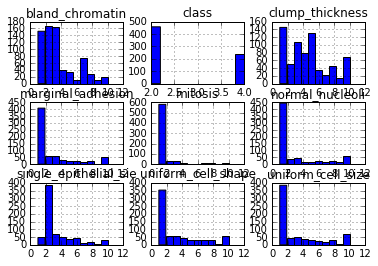

In [13]:
#plot histogram on each variable, this is relatively important because we need to understand the data well
# we need to find a best method to apply a machine learning algorithm
df.hist()
plt.show()

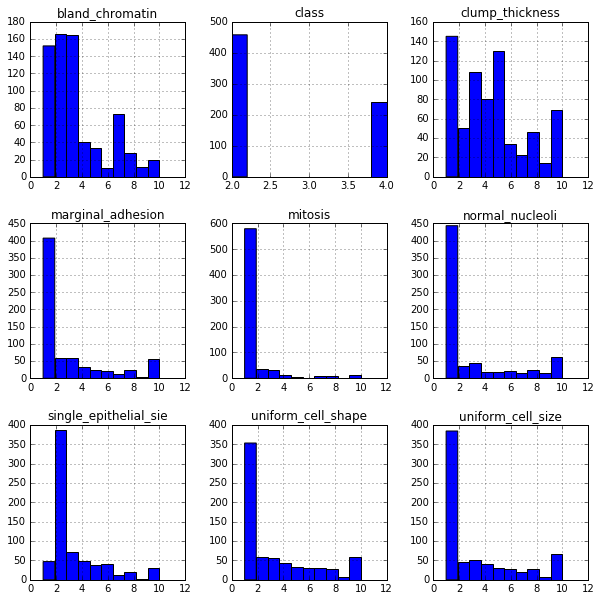

In [14]:
df.hist(figsize= (10,10)) #The size in inches of the figure to create - figsize
plt.show() #some data seemed to be skewed

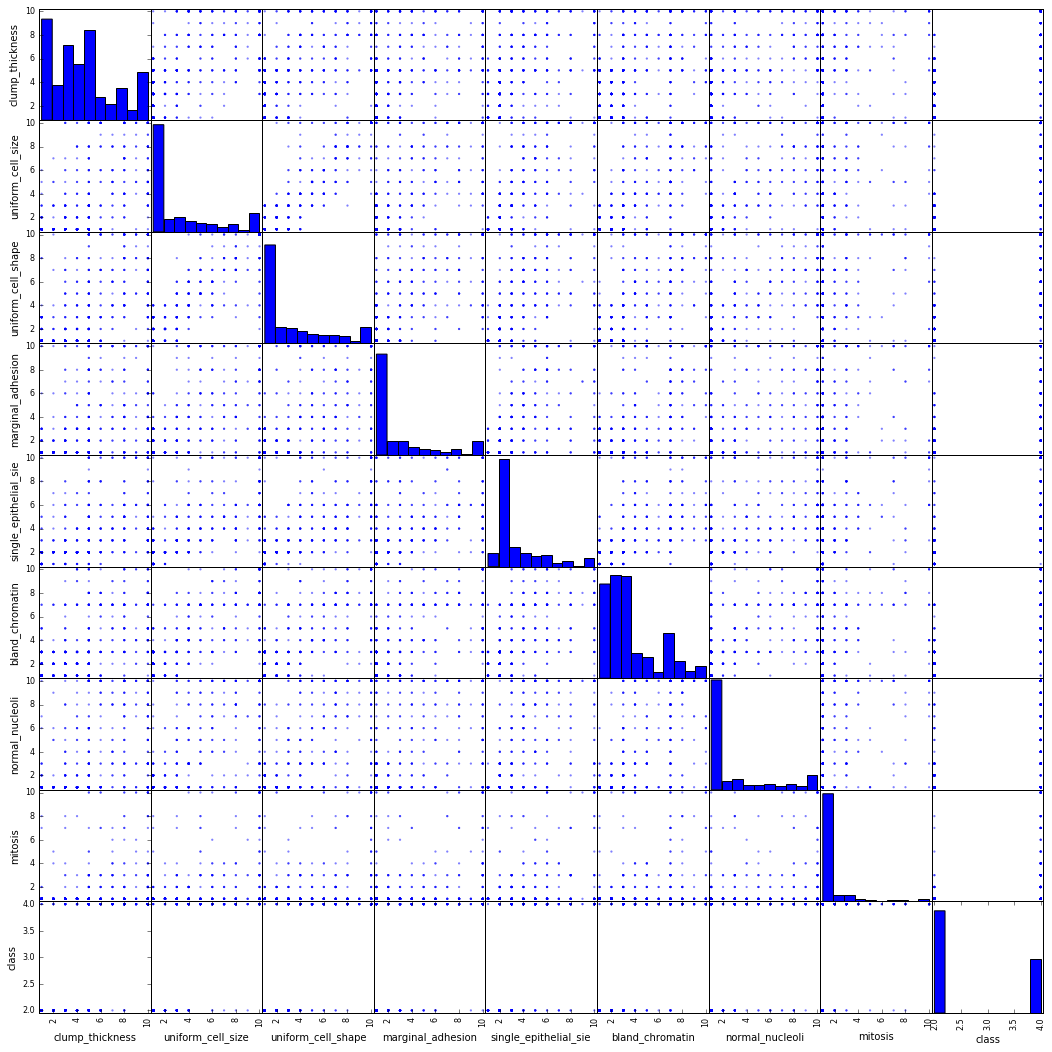

In [27]:
#scatter plot to find the relationship between these variables
#scatter_matrix helps us decide weather single linear will be the right choice or to go for more complex algorithms
scatter_matrix(df,figsize = (18,18)) #pandas method plots scatter plot for every feature with all other features
# when x and y are the same feature we see histograms
plt.show()

In [88]:
#we are going to use machine learning to explore the fact that there are realtionship between these variables
#Split the data set into X and Y for training and testing / validation
#split out the class (label) column out
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

In [89]:
# standard 80:20 split for training:test
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)
#splits X into two subsets and corresponding y into two subsets randomly. but the X,y pair will not be missed.
# both will go to the same subset in the same order

In [90]:
#Specify testing parameters
seed = 8
scoring = 'accuracy'

In [91]:
# define the models to train
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors = 5)))
# KNN - https://dataaspirant.com/2016/12/23/k-nearest-neighbor-classifier-intro/
# Underfitting and overfitting - https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/
models.append(('SVM',SVC()))
# SVM
# https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496

#Evaluate each model in SVM
results = []
names = []

for name,model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    # https://machinelearningmastery.com/k-fold-cross-validation/
    # https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/
    # generates a kfold object that can split the data into 10 folds with the seed as a inital value to randomize the split. 
    # the train data set will be split into 10 equal splits containing test set and reaminin value in each split goes to training set
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    # Evaluate a score by cross-validation
    # print(cv_results) # a list of 10(number of folds) values containing the accuracy value for each test/train data fit to the model
    #[ 1.          0.98214286  0.92857143  0.98214286  1.          0.92857143  1.          0.92857143  0.98214286  1.        ]
    #[ 0.96428571  0.98214286  0.94642857  0.96428571  0.94642857  0.96428571  0.96428571  0.92857143  0.96428571  0.96363636]
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.971364 (0.021451)
SVM: 0.955260 (0.037694)


In [92]:
#Make predictions on the validation dataset (X_test, y_test)
for name,model in models:
    model.fit(X_train,y_train)
    #fits the KNN and SVM model according to the training data
    predictions = model.predict(X_test)
    # predict the lables values for the test set on the KNN and SVM model
    print(name)
    print(accuracy_score(y_test,predictions))
    #  returns the number of correctly classified samples for test lables vs predicted (int).The best performance is the number of samples(all are correctly predicted).
    print(classification_report(y_test,predictions))
    # Build a text report showing the main classification metrics
    # Text summary of the precision, recall, F1 score for each class
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support
    # https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/
    # F1 Score - Harmonic mean of precision and recall
    # Precisoon is the measure of false positives
    # recall is the measure of false negatives

KNN
0.9642857142857143
             precision    recall  f1-score   support

          2       0.98      0.97      0.97        93
          4       0.94      0.96      0.95        47

avg / total       0.96      0.96      0.96       140

SVM
0.9571428571428572
             precision    recall  f1-score   support

          2       0.99      0.95      0.97        93
          4       0.90      0.98      0.94        47

avg / total       0.96      0.96      0.96       140



In [95]:
clf = SVC()
# just an experiment of predicting with some other ma-made example
clf.fit(X_train, y_train)
#fit to the SV Classifier model
accuracy = clf.score(X_test,y_test)
# score () - eturns the mean accuracy on the given test data and labels. accuracy = no. of correct predictions/ total no. of predictions made
# Mean accuracy of self.predict(X) wrt. y.
print(accuracy)
### example = np.array([[4,2,1,1,1,2,3,2,10]]) #matrix - first run
### example = np.array([[4,2,1,1,1,2,3,2,1]]) #matrix - second run
example = np.array([[4,2,1,1,1,2,3,2,5]])
example = example.reshape(len(example),-1)
print(example)
# len(example) specifies the order example - (10 X 1)
# One shape dimension can be -1. In this case, the value is inferred from the length of the array and remaining dimensions.
#example = np.array([4,2,1,1,1,2,3,2,10])
#example = example.reshape(3,-1)
#array([[ 4,  2,  1],
#       [ 1,  1,  2],
#       [ 3,  2, 10]])
prediction = clf.predict(example)
print(prediction)
# we get malignant(4) prediction with 95% percent accuracy mitosis = 10
# we get beningn(2) prediction with 95% percent accuracy mitosis = 1
# # we get malignant(4) prediction with 95% percent accuracy mitosis = 5

0.9571428571428572
[[4 2 1 1 1 2 3 2 5]]
[4]
